In [1]:
#importing the required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [2]:
#loading dataset
data = pd.read_csv('students.csv', sep = ";")
len(data)

649

In [3]:
#generating a binary label(pass/fail), based on G1+G2+G3 (test grade, each 0-20pts); threshod for passing sum>=30.
data['pass'] =  data.apply(lambda row: 1 if (row['G1']+ row['G2'] + row['G3']) >= 35 else 0, axis = 1)
data = data.drop(['G1', 'G2', 'G3'], axis = 1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [4]:
#using one-encoding on categorical columns
data = pd.get_dummies(data, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                      'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                                      'internet', 'romantic'])
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [5]:
#shuffle row
data  = data.sample(frac = 1)

#split training and testing data
train_data = data[:500]
test_data = data[500:]

train_data_attr = train_data.drop(['pass'], axis = 1)
train_data_pass = train_data['pass']

test_data_attr = test_data.drop(['pass'], axis = 1)
test_data_pass = test_data['pass']

attr_data = data.drop(['pass'], axis = 1)
data_pass = data['pass']

#number of passing studensts in the overall dataset
print("Passing: %data out of %data (%.2f%%)" % (np.sum(data_pass), len(data_pass), 
                                                100*float(np.sum(data_pass))/ len(data_pass)))

Passing: 328ata out of 649ata (50.54%)


In [6]:
#fitting a decision tree
t = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
t = t.fit(train_data_attr, train_data_pass)

In [7]:
#saving tree
tree.export_graphviz(t, out_file = 'student-performance.dot', label = 'all', impurity = False, proportion = True,
                    feature_names = list(train_data_attr), class_names = ['pass', 'fail'], filled = True, rounded = True )

In [8]:
#checking the score of the tree
t.score(test_data_attr, test_data_pass)

0.7248322147651006

In [9]:
#verifing the results
scores = cross_val_score(t, attr_data, data_pass, cv = 5)

#showing average score and +/- and standard deviation away(coverings 95% scores)
print("accuracy: %0.2f and +/- %0.2f" % ( scores.mean(), scores.std() * 2))

accuracy: 0.70 and +/- 0.03


In [10]:
#Performing cross-validation on the entire dataset which will split the data on a of
#20/80 basis, where 20% is the on testing set and 80% is on the training set. 
for max_depth in range (1, 20):
    t = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
    scores = cross_val_score(t, attr_data, data_pass, cv = 5)
    print("Max_depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))
    

Max_depth: 1, Accuracy: 0.70 (+/- 0.04)
Max_depth: 2, Accuracy: 0.70 (+/- 0.03)
Max_depth: 3, Accuracy: 0.70 (+/- 0.02)
Max_depth: 4, Accuracy: 0.70 (+/- 0.02)
Max_depth: 5, Accuracy: 0.70 (+/- 0.04)
Max_depth: 6, Accuracy: 0.70 (+/- 0.02)
Max_depth: 7, Accuracy: 0.70 (+/- 0.04)
Max_depth: 8, Accuracy: 0.70 (+/- 0.04)
Max_depth: 9, Accuracy: 0.70 (+/- 0.03)
Max_depth: 10, Accuracy: 0.70 (+/- 0.03)
Max_depth: 11, Accuracy: 0.70 (+/- 0.04)
Max_depth: 12, Accuracy: 0.70 (+/- 0.03)
Max_depth: 13, Accuracy: 0.70 (+/- 0.03)
Max_depth: 14, Accuracy: 0.70 (+/- 0.03)
Max_depth: 15, Accuracy: 0.70 (+/- 0.02)
Max_depth: 16, Accuracy: 0.70 (+/- 0.04)
Max_depth: 17, Accuracy: 0.70 (+/- 0.03)
Max_depth: 18, Accuracy: 0.70 (+/- 0.03)
Max_depth: 19, Accuracy: 0.70 (+/- 0.04)


In [11]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range (1, 20):
    t = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    scores = cross_val_score(t, attr_data, data_pass, cv = 5)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std() * 2
    i += 1
depth_acc
    

array([[ 1.        ,  0.62404293,  0.02209759],
       [ 2.        ,  0.68723912,  0.05043603],
       [ 3.        ,  0.70417412,  0.05609068],
       [ 4.        ,  0.70418605,  0.04123695],
       [ 5.        ,  0.70107335,  0.03299206],
       [ 6.        ,  0.67184258,  0.08287622],
       [ 7.        ,  0.68252832,  0.06242628],
       [ 8.        ,  0.69332141,  0.08191732],
       [ 9.        ,  0.69028026,  0.07063175],
       [10.        ,  0.68565295,  0.05659623],
       [11.        ,  0.65947525,  0.06258973],
       [12.        ,  0.67332141,  0.06168619],
       [13.        ,  0.67184258,  0.06779586],
       [14.        ,  0.67338104,  0.05204336],
       [15.        ,  0.65028026,  0.08212674],
       [16.        ,  0.6549195 ,  0.05812296],
       [17.        ,  0.66411449,  0.02407379],
       [18.        ,  0.66876565,  0.04749563],
       [19.        ,  0.66406679,  0.03705959]])

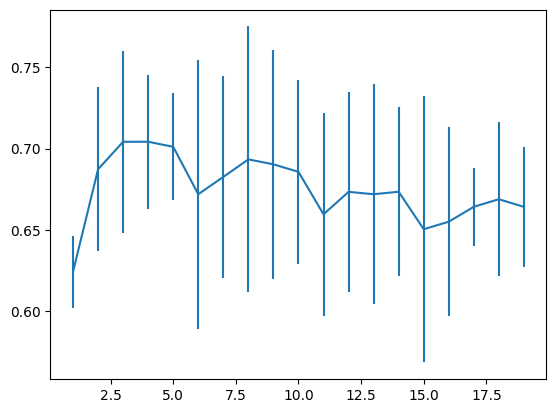

In [12]:
#viz
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr = depth_acc[:,2])
plt.show()